<div class="alert alert-block alert-info"><font size="6"><b>Sprint 10 Task 1 (S10_T01)</b></font><h6 align="right"><u>Author: Alberto Achaval</u></h6></div>

## <SPAN style=color:#1F618D>Level 1</SPAN>

### <SPAN style=color:#1F618D>Practice 1</SPAN>

<SPAN style=color:#1F618D>Create at least three different classification models to try to best predict DelayedFlights.csv flight delay (ArrDelay). Consider whether the flight is late or not (ArrDelay> 0).</SPAN>

First of all I will import the required libraries in order to start with the Sprint. I will import the others as we need them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


Now let's load a copy of the dataset with all the data wrangling we did in S09 T01. This includes: NaN's treatment, variables clasification, some features engineering like Date column, etc.

In [2]:
flight = pd.read_csv('../../9 Sprint/S09 T01 Training and Test Sets/flights_S09T02.csv')
pd.set_option('display.max_columns', 30)

### Descriptive statistical analysis

In [3]:
flight.shape

(1936758, 27)

Almost 2 millon rows and 27 columns.

In [4]:
print(f'Number of NaNs: {flight.isnull().sum().sum()}')

Number of NaNs: 0


<u>**Variable descriptions from original dataset:**</u>   

1. **Year:** 2008 
2. **Month:** 1-12 
3. **DayofMonth:** 1-31 
4. **DayOfWeek:** 1 (Monday) - 7 (Sunday) 
5. **DepTime:** actual departure time (local, hhmm) 
6. **CRSDepTime:** scheduled departure time (local, hhmm) 
7. **ArrTime:** actual arrival time (local, hhmm) 
8. **CRSArrTime:** scheduled arrival time (local, hhmm) 
9. **UniqueCarrier:** unique carrier code 
10. **FlightNum:** flight number 
11. **TailNum:** plane tail number 
12. **ActualElapsedTime:** in minutes 
13. **CRSElapsedTime:** in minutes 
14. **AirTime:** in minutes 
15. **ArrDelay:** arrival delay, in minutes 
16. **DepDelay:** departure delay, in minutes 
17. **Origin:** origin IATA airport code 
18. **Dest:** destination IATA airport code 
19. **Distance:** in miles 
20. **TaxiIn:** taxi in time, in minutes 
21. **TaxiOut:** taxi out time in minutes 
22. **Cancelled:** was the flight cancelled? 1 = yes, 0 = no
23. **CancellationCode:** reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
24. **Diverted:** 1 = yes, 0 = no 
25. **CarrierDelay:** in minutes 
26. **WeatherDelay:** in minutes 
27. **NASDelay:** in minutes 
28. **SecurityDelay:** in minutes 
29. **LateAircraftDelay:** in minutes

Source: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7


In [5]:
flight.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DepTime,1936758.0,1518.534117,450.485255,1.0,1203.0,1545.0,1900.0,2400.0
CRSDepTime,1936758.0,1467.472644,424.766800,0.0,1135.0,1510.0,1815.0,2359.0
ArrTime,1936758.0,1610.114540,547.824622,1.0,1316.0,1715.0,2030.0,2400.0
CRSArrTime,1936758.0,1634.224641,464.634712,0.0,1325.0,1705.0,2014.0,2400.0
FlightNum,1936758.0,2184.263236,1944.702250,1.0,610.0,1543.0,3422.0,9742.0
ActualElapsedTime,1936758.0,133.370061,72.056587,14.0,80.0,116.0,165.0,1114.0
CRSElapsedTime,1936758.0,134.301390,71.339263,-25.0,82.0,116.0,165.0,660.0
AirTime,1936758.0,108.329285,68.637281,0.0,58.0,90.0,137.0,1091.0
ArrDelay,1936758.0,42.259842,56.779219,-109.0,9.0,25.0,56.0,2461.0
DepDelay,1936758.0,43.185176,53.402502,6.0,12.0,24.0,53.0,2467.0


In [6]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 27 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Date               object
 1   DayOfWeek          object
 2   DepTime            int64 
 3   CRSDepTime         int64 
 4   ArrTime            int64 
 5   CRSArrTime         int64 
 6   UniqueCarrier      object
 7   FlightNum          int64 
 8   TailNum            object
 9   ActualElapsedTime  int64 
 10  CRSElapsedTime     int64 
 11  AirTime            int64 
 12  ArrDelay           int64 
 13  DepDelay           int64 
 14  Origin             object
 15  Dest               object
 16  Distance           int64 
 17  TaxiIn             int64 
 18  TaxiOut            int64 
 19  Cancelled          object
 20  CancellationCode   object
 21  Diverted           object
 22  CarrierDelay       int64 
 23  WeatherDelay       int64 
 24  NASDelay           int64 
 25  SecurityDelay      int64 
 26  LateAircraftDe

### Imputation

In order to use all variables for the anlaysis we need them to be numbers so I will transform some of them, actually like they were originally, and also I will get rid of variables that are not very usfull for now.

In [7]:
flight['DayOfWeek']= flight['DayOfWeek'].replace({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, 
                                                  'Saturday': 6, 'Sunday': 7})

In [8]:
flight['Cancelled'] = flight['Cancelled'].replace(["Cancelled","Not Cancelled"], [1, 0])
flight['Diverted'] = flight['Diverted'].replace(["Diverted","Not Diverted"], [1, 0])

In [9]:
flight.Date = pd.to_datetime(flight.Date)

In [10]:
flight = flight.drop(['FlightNum', 'TailNum', 'CancellationCode'], axis=1) # we won't be using these columns

So, the excercice ask that we find a classification model to best predict the **ArrDelay** variable. I like to star with a correlation matrix to see wich variables could be important for this matter. 

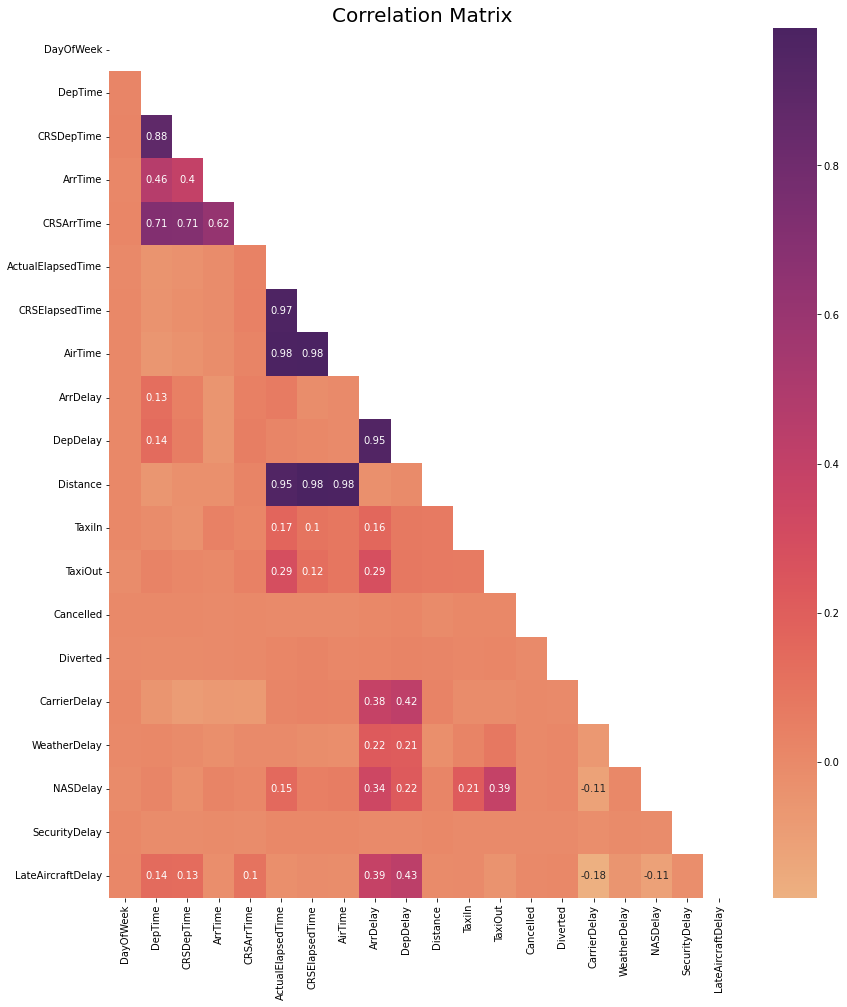

In [11]:
flight_corr = flight.corr()

mask = np.triu(np.ones_like(flight_corr, dtype = bool)) # mask the upper triangle, easier to read
fig, ax = plt.subplots(figsize = (14, 16))

sns.heatmap(flight_corr, mask = mask, cmap = 'flare', annot = True, annot_kws = {"size": 10})

for t in ax.texts:
    if float(t.get_text()) >= 0.1: # if the value is greater than 0.1 then I set the text 
        t.set_text(t.get_text()) 
    elif float(t.get_text()) <= -0.1: # if the value is smaller than -0.1 then I set the text 
        t.set_text(t.get_text())
    else:
        t.set_text("") # if not it sets an empty text

plt.title('Correlation Matrix', fontsize = 20)
plt.show()

**DepDelay** has a very strong correlation with our target variable. There are some other variables that have a soft correlation, all the **Delays** and **TaxiOut**.

In order to solve this practice and be able to rerun code faster, I'm going to take a sample from data and do hypotesys testing to verify that mean of DepDelay is equal in sample and population with 95% a level of confidence.  

In [12]:
popmean = flight.ArrDelay.mean()
x = flight.ArrDelay.sample(10000, random_state = 7)
alpha = 0.005

result = stats.ttest_1samp(x, popmean, alternative='two-sided')
print(f'The two tailed P-value is {round(result[1],3)}')

if result[1] < alpha: 
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The two tailed P-value is 0.23
The null hypothesis cannot be rejected


 We will use flights dataset with a sample of 100.00 observations from now onwards.

In [13]:
flights = flight.sample(10000, random_state = 7).reset_index(drop = True) # we use flights dataset from now onwards

The excercice ask to consider whether the flight is late or not (ArrDelay> 0). This is a binary classification were the elements are set into two groups on the basis of a classification rule. Let's transform **ArrDelay** into a binary class: 

In [14]:
flights.ArrDelay = [1 if x > 0 else 0 for x in flights.ArrDelay]

Class labels are often string values, e.g. “spam,” “not spam,” and must be mapped to numeric values before being provided to an algorithm for modeling. We are going to use Target Encoder library for this purpose were features are replaced with a blend of posterior probability of the target given particular categorical value and the prior probability of the target over all the training data.

In [15]:
from category_encoders import TargetEncoder

flights[['UniqueCarrier', 'Origin','Dest']] = TargetEncoder().fit_transform(flights[['Origin','Dest','UniqueCarrier']], flights['ArrDelay'])

We are going to split the dataset between independent features, called (x), and dependent variable called (y) in order to Train and Test the model. In this case the dependent variable is **ArrDelay**.

In [16]:
from sklearn.model_selection import train_test_split

x = flights.drop(['ArrDelay', 'Date'], axis = 'columns')
y = pd.DataFrame(flights.ArrDelay)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7) # 80%-20% proportion

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 22), (2000, 22), (8000, 1), (2000, 1))

Now we have the data splited into Train And Test and it is time to model. 😎


### First model: Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate and train Decision Tree classifer 
dt_class = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_class = dt_class.fit(x_train, np.ravel(y_train))

#Predict the response for test dataset
y_pred_dt = dt_class.predict(x_test)

### Second model: K Nearest Neighbors Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier

#instantiate Kn Classifier
kn_class = KNeighborsClassifier(n_neighbors=5)

#Train Kn Classifier
kn_class.fit(x_train, np.ravel(y_train))

#Predict with test data
y_pred_kn = kn_class.predict(x_test)

### Third model: XGBosst Classifier

In [20]:
import xgboost as xgb

#instantiate XGBoost classifier
xgb_class = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

#fit the classification
xgb_class.fit(x_train, y_train)

#Predict on test
y_pred_xgb = xgb_class.predict(x_test)

### Fourth model: Logistic Regression Classifier

In [21]:
from sklearn.linear_model import LogisticRegression

#instantiate LogisticRegression classifier
lr_class = LogisticRegression()


#fit the classification
lr_class.fit(x_train, np.ravel(y_train))

#Predict on test
y_pred_lr = lr_class.predict(x_test)

### <SPAN style=color:#1F618D>Practice 2</SPAN>

<SPAN style=color:#1F618D>Compare classification models using accuracy, a confidence matrix, and other more advanced metrics.</SPAN>

Now let's compare the models with the use of the tools and metrics that we've got from this source:

https://towardsdatascience.com/how-to-best-evaluate-a-classification-model-2edb12bcc587

In order to do that in the most efficient way that I can think off, I'm going to use a function that calculates everything I need to compare between models. This function is going to be used throughout the entire notebook.

In [22]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Metrics
def compare_models(y_test, y_pred, model_name, classifier):
    
    # Confusion Matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred) # calculate confusion matrix

    # Plot matrix in heatmap
    fig, ax = plt.subplots(figsize = (16,5))
    sns.heatmap(confusion_matrix, annot = True, fmt = 'd', annot_kws = {'size': 20}, cmap = 'YlOrBr') 
    plt.ylabel('Actual', fontsize = 20) 
    plt.xlabel('Predicted', fontsize = 20) 
    plt.suptitle('CONFUSION MATRIX',fontsize = 20, fontweight = 'bold') 
    plt.title(model_name, loc = 'left', fontsize = 20)
    plt.subplots_adjust(top = 0.8) 
    plt.show()
    
    # Metrics
    Accuracy = round(metrics.accuracy_score(y_test, y_pred),2)
    Precision = round(metrics.precision_score(y_test, y_pred),2)
    Recall = round(metrics.recall_score(y_test, y_pred),2)
    F1 = round(metrics.f1_score(y_test, y_pred),2)
    
    # K Fold Cross_Validation
    KF_scores = cross_val_score(classifier, x, np.ravel(y), cv=5)
    
    # Dataframe with metrics to compare throughout the entire notebook
    confusion_matrix_metrics = pd.DataFrame([{'Accuracy': Accuracy, 'Precision': Precision, 'Recall': Recall,
                                              'F1': F1, 'K Fold CV': KF_scores.mean()*100}], index=[model_name])

    print('\n' * 4)
    return confusion_matrix_metrics

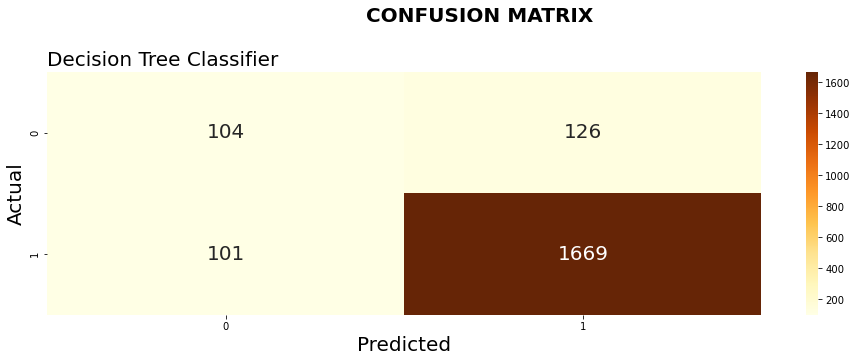

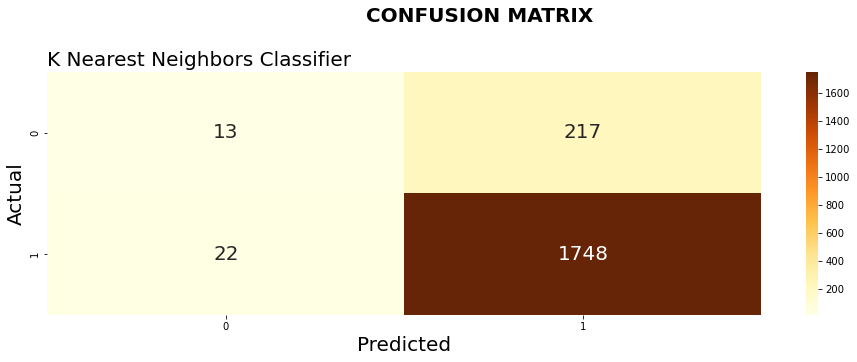

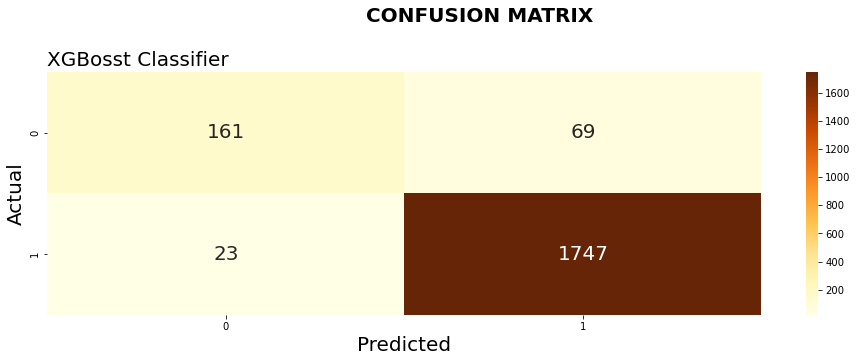

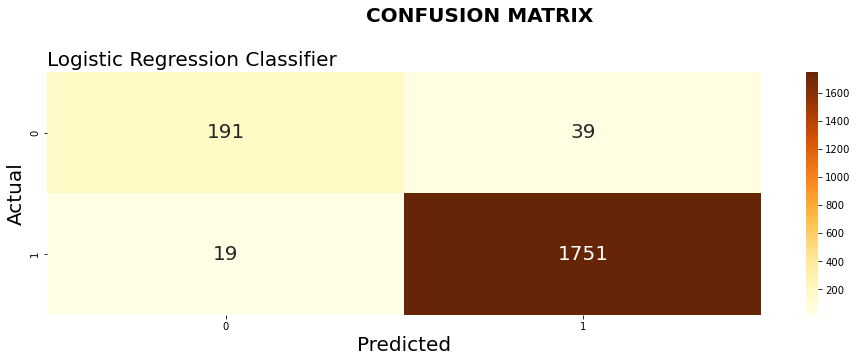

In [23]:
comparing_models = pd.DataFrame()
comparing_models = comparing_models.append(compare_models(y_test, y_pred_dt, 'Decision Tree Classifier', dt_class))
comparing_models = comparing_models.append(compare_models(y_test, y_pred_kn, 'K Nearest Neighbors Classifier', kn_class))
comparing_models = comparing_models.append(compare_models(y_test, y_pred_xgb, 'XGBosst Classifier', xgb_class))
comparing_models = comparing_models.append(compare_models(y_test, y_pred_lr, 'Logistic Regression Classifier', lr_class))

In [24]:
comparing_models  # Dataframe with metrics off all the models so far

,Accuracy,Precision,Recall,F1,K Fold CV
Decision Tree Classifier,0.89,0.93,0.94,0.94,88.90
K Nearest Neighbors Classifier,0.88,0.89,0.99,0.94,89.17
XGBosst Classifier,0.95,0.96,0.99,0.97,95.46
Logistic Regression Classifier,0.97,0.98,0.99,0.98,96.38


**Analysis:**

1. XGBoost and Logistic Regression Classifiers are the models that predict **ArrDelay** more accurately. These models have  the higher metrics and there is not much espace left to improvement. Note that when we model Logistic Regression it gave us a warning that we intend to attend in the following steps of the notebook. K Fold Cross Validation is pretty high as well, this assure us no overfitting.
2. Decision Tree and K Nearest Neighbors Classifiers are not bad predictors. Maybe adjusting some parameters or with some Feature Engineering we can increase their accuracy. This is what we will do in the following steps of the notebook.


**ROC_AUC curve:**

ROC curve summarizes the performance of the model at different threshold values by combining confusion matrices at all threshold values. We aim to increase the true positive rate (TPR) while keeping false positive rate (FPR) low. The closer the AUC is to 1, the better the classifier is.

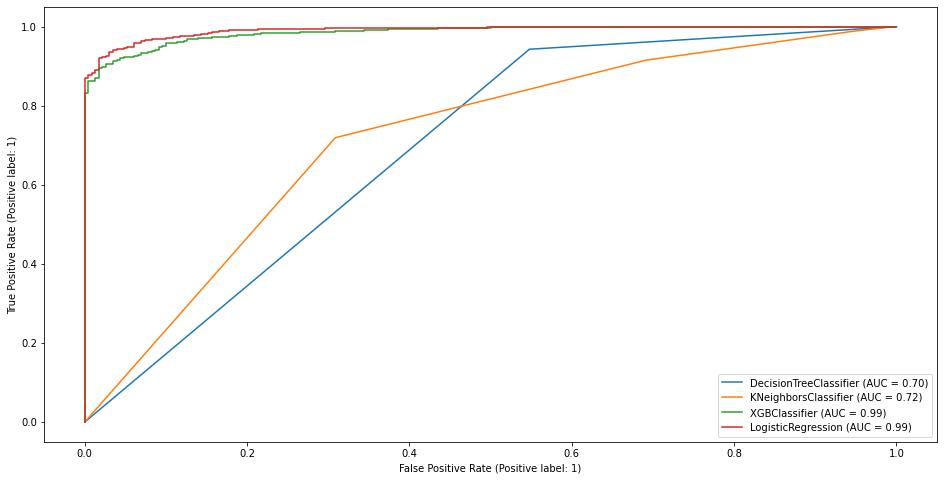

In [25]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize = (16,8))
RocCurveDisplay.from_estimator(dt_class, x_test, y_test, ax = ax)
RocCurveDisplay.from_estimator(kn_class, x_test, y_test, ax = ax)
RocCurveDisplay.from_estimator(xgb_class, x_test, y_test, ax = ax)
RocCurveDisplay.from_estimator(lr_class, x_test, y_test, ax = ax)
plt.show()

If we have to rank the models by their ROC_AUC curve it would be:  
   1. Logistic Regression  
   2. XGBoost  
   3. K Nearest Neighbors  
   4. Decision Tree  
   
As we said, there is room to improvement for K Nearest Neighbors and Decision Tree models that it will be addressed shortly.

### <SPAN style=color:#1F618D>Practice 3</SPAN>

<SPAN style=color:#1F618D>Train them using the different parameters they support.</SPAN>

### Decision Tree Classifier - Parameters

class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

* **criterion:** {“gini”, “entropy”}, default=”gini”
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

* **splitter:** {“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

* **max_depth:** int, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

* **max_features:** int, float or {“auto”, “sqrt”, “log2”}, default=None
The number of features to consider when looking for the best split.


In [26]:
# instantiate Decision Tree classifer 
dt_class3 = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', max_depth = 5, max_features = 'auto')

# Train Decision Tree Classifer
dt_class3 = dt_class3.fit(x_train, np.ravel(y_train))

#Predict the response for test dataset
y_pred_dt3 = dt_class3.predict(x_test)

Note: I dont't expect much improvement with these parameters, if not worst metrics..

### K Nearest Neighbors Classifier - Parameters

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

* **n_neighbor:** sint, default=5
Number of neighbors to use by default for kneighbors queries.

* **weights:** {‘uniform’, ‘distance’} or callable, default=’uniform’
Weight function used in prediction.

* **algorithm:** {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
Algorithm used to compute the nearest neighbors.

In [27]:
from sklearn.neighbors import KNeighborsClassifier

#instantiate Kn Classifier
kn_class3 = KNeighborsClassifier(n_neighbors = 1, weights = 'distance', algorithm = 'brute')

#Train Kn Classifier
kn_class3.fit(x_train, np.ravel(y_train))

#Predict with test data
y_pred_kn3 = kn_class3.predict(x_test)

### Logistic Regression Classifier - Parameters

class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

* **penalty:** {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
Specify the norm of the penalty.

* **solver:** {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. 

* **max_iter:** int, default=100
Maximum number of iterations taken for the solvers to converge.

In [28]:
from sklearn.linear_model import LogisticRegression

#instantiate LogisticRegression classifier
lr_class3 = LogisticRegression(penalty = 'none', solver = 'sag', max_iter = 10000)

#fit the classification
lr_class3.fit(x_train, np.ravel(y_train))

#Predict on test
y_pred_lr3 = lr_class3.predict(x_test)

Let's run our function to see confusion matrix and metrics:

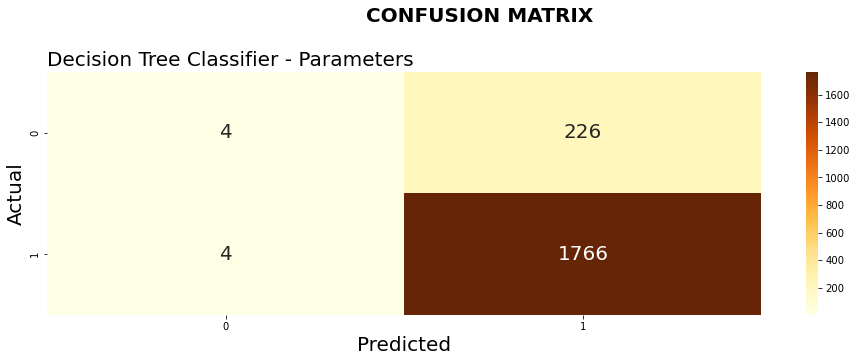

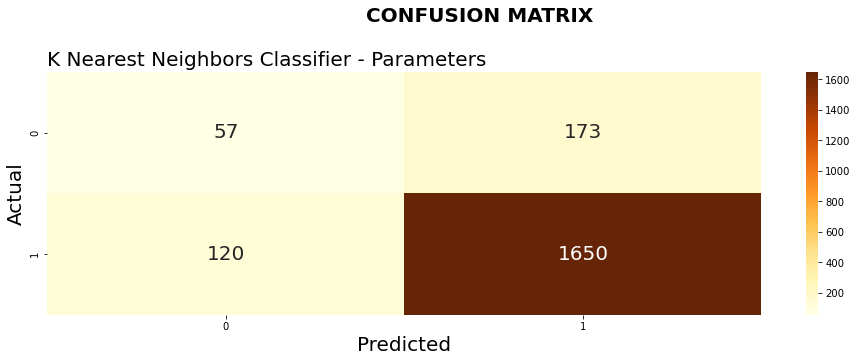

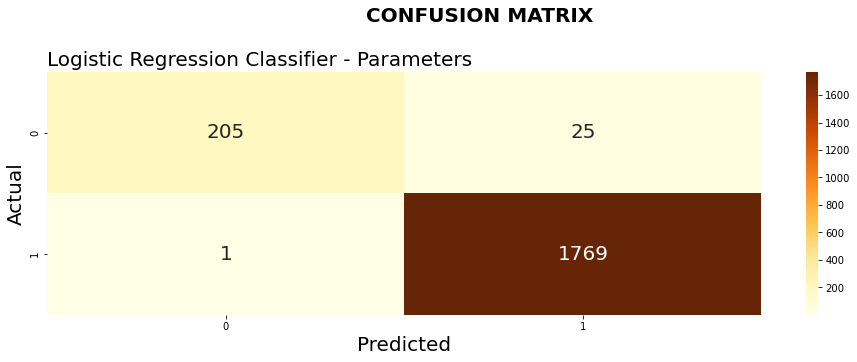

,Accuracy,Precision,Recall,F1,K Fold CV
Decision Tree Classifier,0.89,0.93,0.94,0.94,88.90
Decision Tree Classifier - Parameters,0.88,0.89,1.00,0.94,89.54
K Nearest Neighbors Classifier,0.88,0.89,0.99,0.94,89.17
K Nearest Neighbors Classifier - Parameters,0.85,0.91,0.93,0.92,86.16
Logistic Regression Classifier,0.97,0.98,0.99,0.98,96.38
Logistic Regression Classifier - Parameters,0.99,0.99,1.00,0.99,98.60
XGBosst Classifier,0.95,0.96,0.99,0.97,95.46


In [29]:
comparing_models = comparing_models.append(compare_models(y_test, y_pred_dt3, 'Decision Tree Classifier - Parameters', dt_class3))
comparing_models = comparing_models.append(compare_models(y_test, y_pred_kn3, 'K Nearest Neighbors Classifier - Parameters', kn_class3))
comparing_models = comparing_models.append(compare_models(y_test, y_pred_lr3, 'Logistic Regression Classifier - Parameters', lr_class3))
comparing_models.sort_index()

**Analysis:**

1. For Decision Tree and K Nearest Neighbors Classifiers some of the metrics improved but others decreased. It is not clear if we gained or lost by adjusting the parameters. Shurely default parameters are a good option.
2. The Logistic Regression Classifier improved it's metrics almost near to a perfect match. 

**ROC_AUC curve:**

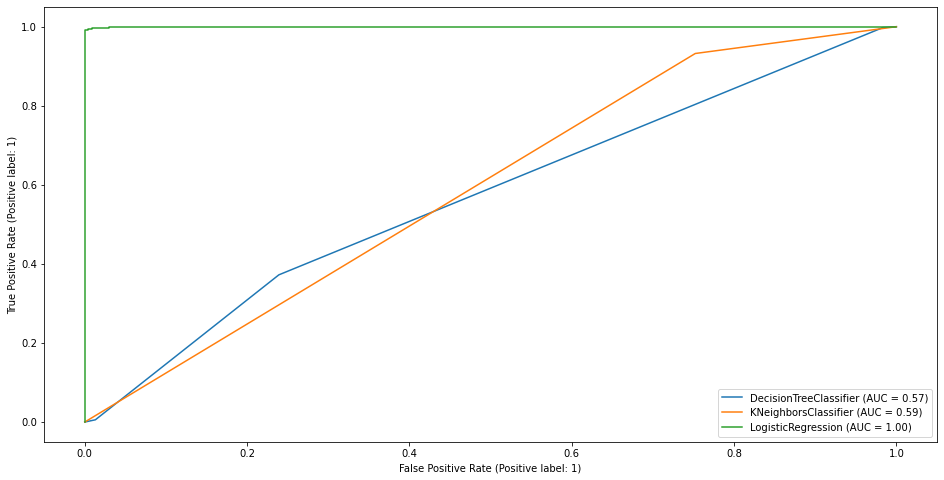

In [30]:
fig, ax = plt.subplots(figsize = (16,8))
RocCurveDisplay.from_estimator(dt_class3, x_test, y_test, ax = ax) 
RocCurveDisplay.from_estimator(kn_class3, x_test, y_test, ax = ax) 
RocCurveDisplay.from_estimator(lr_class3, x_test, y_test, ax = ax)
plt.show()

Comparing this plot with the previous one we can see that while the Logisctic Regression method has a higher AUC, the other two decreased theirs, from 0.68 to 0.67 the Decision Tree and from 0.72 to 0.59 the K Nearest Neighbors model, probably because we decreased the number of neighbors form 5 to 1.

### <SPAN style=color:#1F618D>Practice 4</SPAN>

<SPAN style=color:#1F618D>Compare your performance using the traint / test or cross-validation approach.</SPAN>

We already did the Train/Test 80%-20% approach and K-Fold Cross validation in the previous steps.

**K-Fold Cross-Validation:**  
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into.The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    1. Take the group as a hold out or test data set
    2. Take the remaining groups as a training data set
    3. Fit a model on the training set and evaluate it on the test set
4. Retain the evaluation score and discard the model
5. Summarize the skill of the model using the sample of model evaluation scores

## <SPAN style=color:#1F618D>Level 2</SPAN>

### <SPAN style=color:#1F618D>Practice 5</SPAN>

<SPAN style=color:#1F618D>Perform some feature engineering process to improve prediction.</SPAN>

In [31]:
print(y_train.value_counts())

ArrDelay
1           7193
0            807
dtype: int64


We have unbalance data. For this prcatice I'm going to balance with SMOTE technique and scale data.

In [32]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy='minority')
x5, y5 = oversample.fit_resample(x, y)

In [33]:
y5.value_counts()

ArrDelay
0           8963
1           8963
dtype: int64

Now we have a balanced dataframe. Let's scale it now:

In [34]:
from sklearn.preprocessing import StandardScaler

x5_ss = pd.DataFrame(StandardScaler().fit_transform(x5))
x5_ss.columns = x5.columns

y5_ss = pd.DataFrame(StandardScaler().fit_transform(y5))
y5_ss.columns = y5.columns

In [35]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(x5_ss, y5_ss, test_size = 0.2, random_state = 7) # 80%-20% proportion

### Decision Tree Classifier - Feature Engineering

In [36]:
from sklearn.tree import DecisionTreeClassifier

# instantiate Decision Tree classifer 
dt_class5 = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_class5 = dt_class5.fit(x_train5, np.ravel(y_train5))

#Predict the response for test dataset
y_pred_dt5 = dt_class5.predict(x_test5)

### K Nearest Neighbors Classifier - Feature Engineering

In [37]:
from sklearn.neighbors import KNeighborsClassifier

#instantiate Kn Classifier
kn_class5 = KNeighborsClassifier(n_neighbors=5)

#Train Kn Classifier
kn_class5.fit(x_train5, np.ravel(y_train5))

#Predict with test data
y_pred_kn5 = kn_class5.predict(x_test5)

### Logistic Regrssion Classifier - Feature Engineering

In [38]:
from sklearn.linear_model import LogisticRegression

#instantiate LogisticRegression classifier
lr_class5 = LogisticRegression()


#fit the classification
lr_class5.fit(x_train5, np.ravel(y_train5))

#Predict on test
y_pred_lr5 = lr_class5.predict(x_test5)

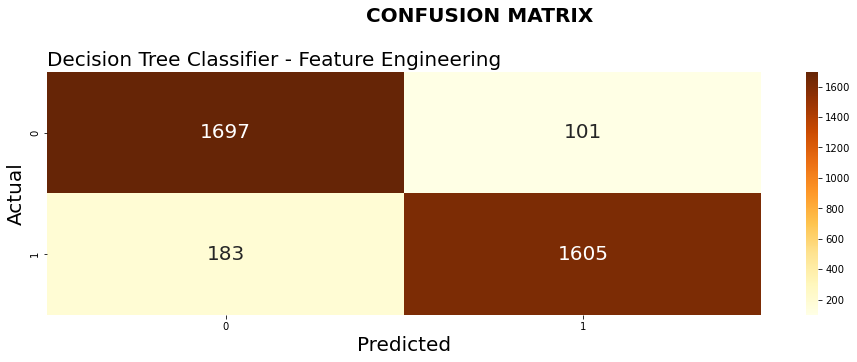

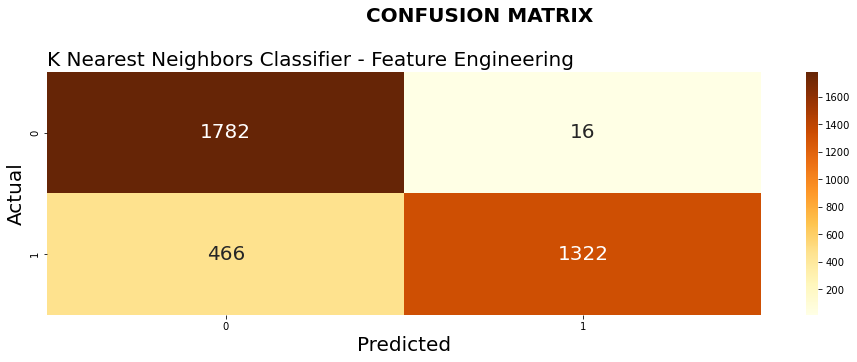

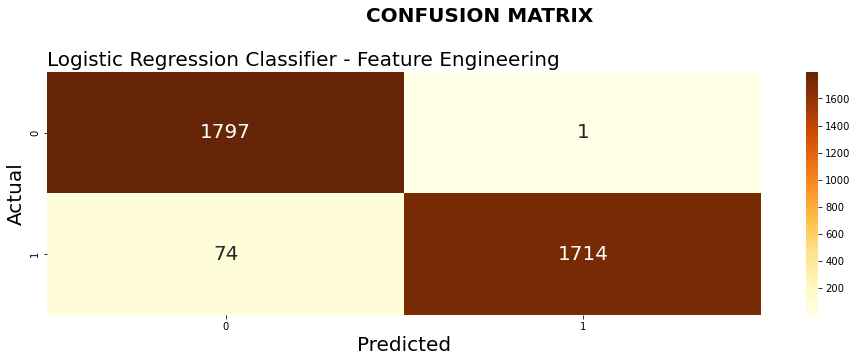

,Accuracy,Precision,Recall,F1,K Fold CV
Decision Tree Classifier,0.89,0.93,0.94,0.94,88.90
Decision Tree Classifier - Feature Engineering,0.92,0.94,0.90,0.92,88.85
Decision Tree Classifier - Parameters,0.88,0.89,1.00,0.94,89.54
K Nearest Neighbors Classifier,0.88,0.89,0.99,0.94,89.17
K Nearest Neighbors Classifier - Feature Engineering,0.87,0.99,0.74,0.85,89.17
K Nearest Neighbors Classifier - Parameters,0.85,0.91,0.93,0.92,86.16
Logistic Regression Classifier,0.97,0.98,0.99,0.98,96.38
Logistic Regression Classifier - Feature Engineering,0.98,1.00,0.96,0.98,96.38
Logistic Regression Classifier - Parameters,0.99,0.99,1.00,0.99,98.60
XGBosst Classifier,0.95,0.96,0.99,0.97,95.46


In [39]:
comparing_models = comparing_models.append(compare_models(y_test5, y_pred_dt5, 'Decision Tree Classifier - Feature Engineering', dt_class5))
comparing_models = comparing_models.append(compare_models(y_test5, y_pred_kn5, 'K Nearest Neighbors Classifier - Feature Engineering', kn_class5))
comparing_models = comparing_models.append(compare_models(y_test5, y_pred_lr5, 'Logistic Regression Classifier - Feature Engineering', lr_class5))
comparing_models.sort_index()

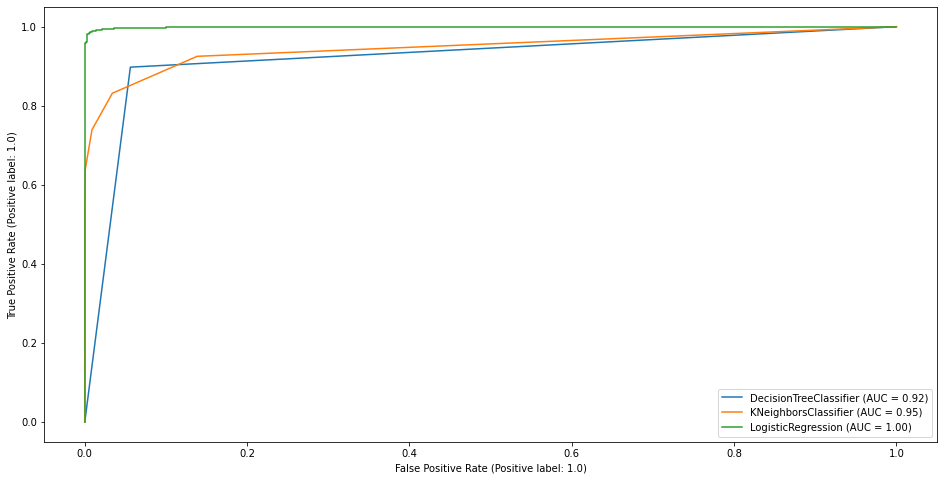

In [40]:
fig, ax = plt.subplots(figsize = (16,8))
RocCurveDisplay.from_estimator(dt_class5, x_test5, y_test5, ax = ax) 
RocCurveDisplay.from_estimator(kn_class5, x_test5, y_test5, ax = ax) 
RocCurveDisplay.from_estimator(lr_class5, x_test5, y_test5, ax = ax)
plt.show()

The engineering we did with features did quite a good job. AUC increased a lot for Decision Tree and KNeighbors but metrics not that much. Special consideration to the increase of False Negatives for KNeighbors as we see in confusion matrix. Prviously we had 120 FN and now 482, 4 times more that have been taken from True Negatives (we had 1650 and now 1306). Thats why Recall metric is lower.

## <SPAN style=color:#1F618D>Level 3</SPAN>

### <SPAN style=color:#1F618D>Practice 6</SPAN>

<SPAN style=color:#1F618D>Do not use the DepDelay variable when making predictions.</SPAN>

Let's get rid of **DepDelay** variable:

In [41]:
x_train6 = x_train.drop(['DepDelay'], axis = 'columns')
x_test6 = x_test.drop(['DepDelay'], axis = 'columns')

### Decision Tree Classifier - no DepDelay

In [42]:
# instantiate Decision Tree classifer 
dt_class6 = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_class6 = dt_class6.fit(x_train6, np.ravel(y_train))

#Predict the response for test dataset
y_pred_dt6 = dt_class6.predict(x_test6)

### K Nearest Neighbors Classifier - no DepDelay

In [43]:
#instantiate Kn Classifier
kn_class6 = KNeighborsClassifier(n_neighbors=5)

#Train Kn Classifier
kn_class6.fit(x_train6, np.ravel(y_train))

#Predict with test data
y_pred_kn6 = kn_class6.predict(x_test6)

### XGBosst Classifier - no DepDelay

In [44]:
#instantiate XGBoost classifier
xg_class6 = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

#fit the classification
xg_class6.fit(x_train6, y_train)

#Predict on test
y_pred_xgb6 = xg_class6.predict(x_test6)

### Logistic Regression Classifier - no DepDelay

In [45]:
#instantiate LogisticRegression classifier
lr_class6 = LogisticRegression()


#fit the classification
lr_class6.fit(x_train6, np.ravel(y_train))

#Predict on test
y_pred_lr6 = lr_class6.predict(x_test6)

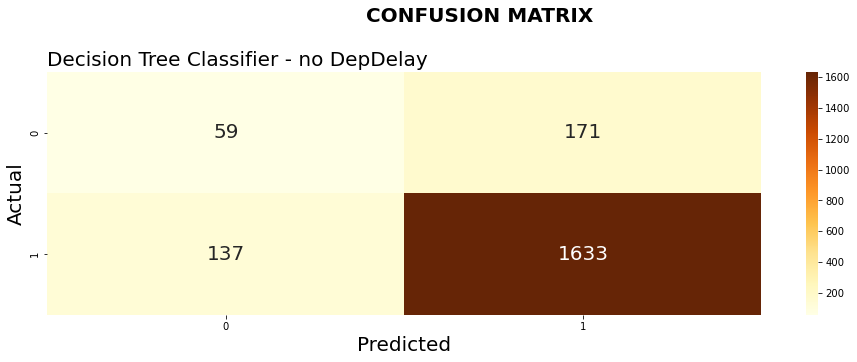

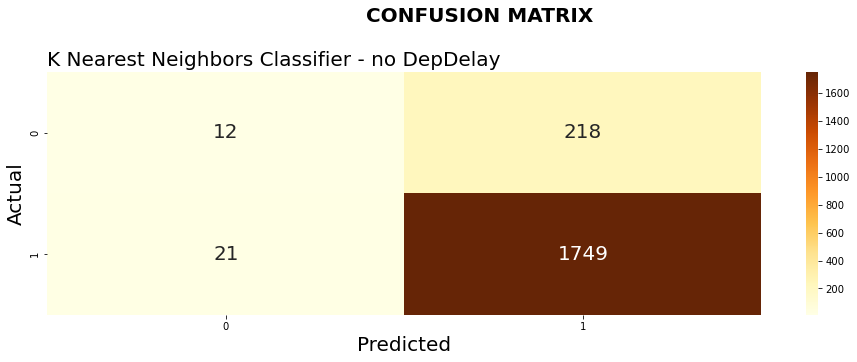

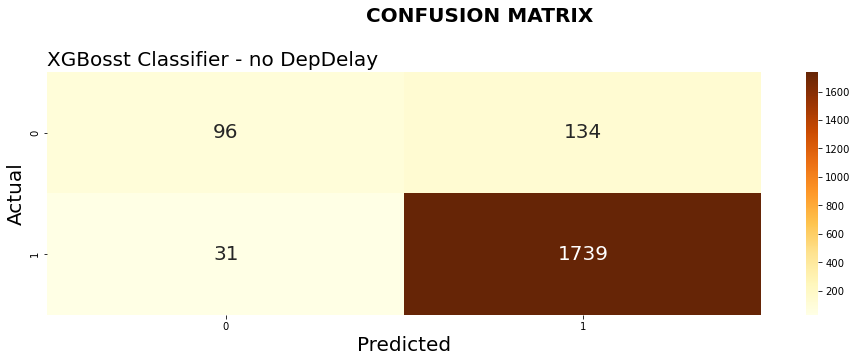

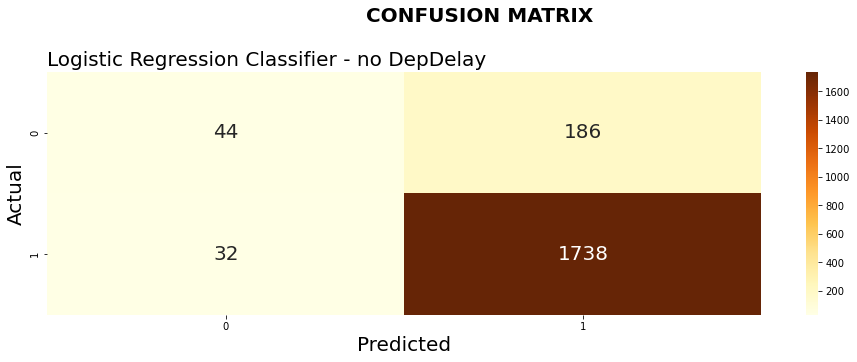

,Accuracy,Precision,Recall,F1,K Fold CV
Decision Tree Classifier,0.89,0.93,0.94,0.94,88.90
Decision Tree Classifier - Feature Engineering,0.92,0.94,0.90,0.92,88.85
Decision Tree Classifier - Parameters,0.88,0.89,1.00,0.94,89.54
Decision Tree Classifier - no DepDelay,0.85,0.91,0.92,0.91,88.70
K Nearest Neighbors Classifier,0.88,0.89,0.99,0.94,89.17
K Nearest Neighbors Classifier - Feature Engineering,0.87,0.99,0.74,0.85,89.17
K Nearest Neighbors Classifier - Parameters,0.85,0.91,0.93,0.92,86.16
K Nearest Neighbors Classifier - no DepDelay,0.88,0.89,0.99,0.94,89.17
Logistic Regression Classifier,0.97,0.98,0.99,0.98,96.38
Logistic Regression Classifier - Feature Engineering,0.98,1.00,0.96,0.98,96.38


In [46]:
comparing_models = comparing_models.append(compare_models(y_test, y_pred_dt6, 'Decision Tree Classifier - no DepDelay', dt_class6))
comparing_models = comparing_models.append(compare_models(y_test, y_pred_kn6, 'K Nearest Neighbors Classifier - no DepDelay', kn_class6))
comparing_models = comparing_models.append(compare_models(y_test, y_pred_xgb6, 'XGBosst Classifier - no DepDelay', xg_class6))
comparing_models = comparing_models.append(compare_models(y_test, y_pred_lr6, 'Logistic Regression Classifier - no DepDelay', lr_class6))
comparing_models.sort_index()

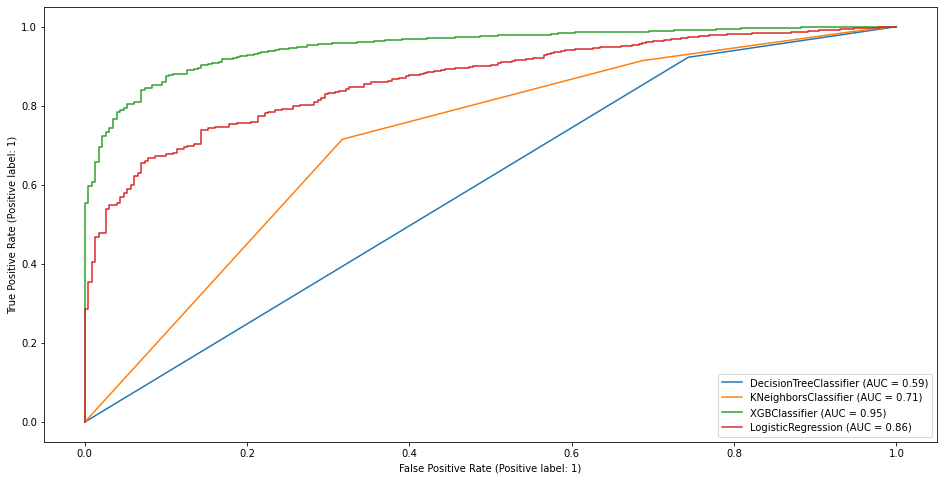

In [47]:
fig, ax = plt.subplots(figsize = (16,8))
RocCurveDisplay.from_estimator(dt_class6, x_test6, y_test, ax = ax) 
RocCurveDisplay.from_estimator(kn_class6, x_test6, y_test, ax = ax)
RocCurveDisplay.from_estimator(xg_class6, x_test6, y_test, ax = ax) 
RocCurveDisplay.from_estimator(lr_class6, x_test6, y_test, ax = ax)
plt.show()

As expected, without **DepDelay** there has been a decrease in the metrics as this variable has a strong correlation with **ArrDelay**. Special mention to XGB Classifier model thas has the higher metrics except K Fold CV where the Logistic Regression is stronger.